In [1]:
import numpy as np

### Pressuposições Belo Horizonte - Bairro Sion

- IGPM aluguel 7% ano 
- Valor imóvel cresce = à sua depreciação devido ao desgaste natural com o tempo. Valor imóvel não muda.
- Condomínio será sempre pago.
- SELIC 6.5% ano

### Financiamento ou aluguel por **X** anos qual dá o melhor valor presente?

In [2]:
aluguel = 1600
condominio = 800 # condominio + iptu etc 
valor_imovel = 600e3
x_anos = 20
igpm = (0.07+1)**(1./12)-1 # aumento mensal do aluguel por contrato hoje
# mas qual o histórico médio do Brasil? parece razoável esse valor na média
selic = (0.065+1)**(1./12)-1 # mensal
meses  = x_anos*12
entrada = 200e3
txjuros = (0.084+1)**(1./12)-1 # mensal taxa de juros caixa economica financiamento
#ipca = 

In [3]:
txjuros, selic

(0.006744131841185608, 0.00526169427684775)

**SAC significa Sistema de Amortização Constante**

Para calcular o valor da amortização basta dividir o valor financiado pelo número de meses. Suponha um financiamento de 110.500,00 em 360 meses à 0,72% ao mês:

amortização = 110500/360 = 306,94  
1a parcela = 306,94 + 0,72%x110500 = 1.102,54  
2a parcela = 306,94 + 0,72%x(110500-1x306,94) = 1.100,33  
3a parcela = 306,94 + 0,72%x(110500-2x306,94) = 1.098,12  

In [4]:
def sac(valor, meses, txjuros):
    """
    retorna parcelas do financiamento
    baseado no SAC    
    """
    amort = valor/meses
    return amort + txjuros*(valor-np.arange(meses)*amort)

In [5]:
from matplotlib import pyplot as plt

In [6]:
%matplotlib inline

Fluxo de Caixa:

#### Compra:

- (-) dinheiro entrada
- (-) mensal do financiamento
- (+) valor do imóvel inalterado no final do período
- (-) condomínio


- Não incluso
  - parcela seguro obrigatório financiamento
  - TR adicionada à taxa de juros
   
#### Aluguel:  

- (-) condomínio
- (-) aluguel corrigido IGPM
- (+) dinheiro entrada corrigido SELIC

### Fluxo de caixa mensal - Comprar

valor da operação:  -317067.1547451464


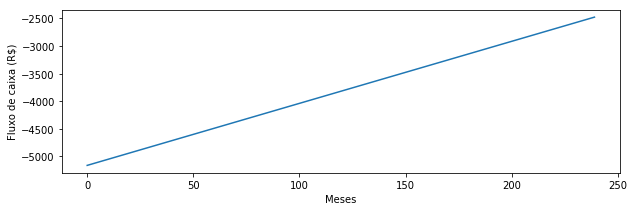

In [7]:
def comprar():
    return -sac(valor_imovel-entrada, meses, txjuros) - condominio
plt.figure(figsize=(10,3))
plt.plot(np.arange(meses), comprar())
plt.ylabel('Fluxo de caixa (R$)')
plt.xlabel('Meses')
print('valor da operação: ', np.sum(comprar())+valor_imovel)

### Fluxo de caixa mensal - Alugar

valor da operação:  -299329.1897978338


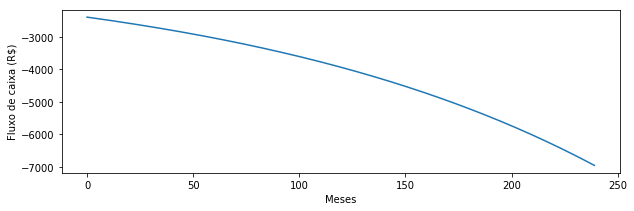

In [8]:
def alugar():
    return -(condominio+aluguel*np.power(1+igpm, np.arange(meses))) # aluguel corrigido igpm 

plt.figure(figsize=(10,3))
plt.plot(np.arange(meses), alugar())
plt.ylabel('Fluxo de caixa (R$)')
plt.xlabel('Meses')
print('valor da operação: ', np.sum(alugar())+entrada*(selic+1)**meses)

#### Valor presente

$$ Vp = \sum_i^N{\frac{R_t}{(1+i)^t}} $$

Somatória dos iésimo fluxo de caixa descontado.  
A taxa $i$ de desconto é a inflação? ipca? igpm?  deveria ser a taxa real de juros! renda fixa-inflação

Vamos calcular então aproximadamente quanto é $i$ historicamente.

In [9]:
pwd

'/home/andre/Projects/sandbox'

In [10]:
import pandas as pd

IGPM mensal 

https://www.sei.ba.gov.br/images/indicadores_especiais/xls/outros_indices/ind_outros_igp_m.xls

In [11]:
igpm = pd.read_excel('ind_outros_igp_m.xlsx') # IGPM

In [12]:
anos = igpm['Período'].values
print(anos)

[1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]


In [13]:
igpm = igpm.drop(columns=['Período'])

In [14]:
igpm.head()

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
0,0.92,1.39,1.12,2.10,0.58,2.46,1.82,2.20,-0.71,0.52,1.20,0.71
1,1.73,0.97,0.40,0.32,1.55,1.02,1.35,0.28,0.10,0.19,0.20,0.73
2,1.77,0.43,1.15,0.68,0.21,0.74,0.09,0.09,0.48,0.37,0.64,0.84
3,0.96,0.18,0.19,0.13,0.14,0.38,-0.17,-0.16,-0.08,0.08,-0.32,0.45
4,0.84,3.61,2.83,0.71,-0.29,0.36,1.55,1.56,1.45,1.70,2.39,1.81


In [15]:
igpm = igpm.values.ravel()

In [16]:
range_months = pd.date_range(start=str(anos[0]), end=str(anos[-1]+1), freq='M')

In [17]:
range_months[-13:]

DatetimeIndex(['2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31',
               '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31',
               '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30',
               '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [18]:
len(igpm), len(range_months)

(288, 288)

In [19]:
igpm = pd.Series(igpm, index=range_months)

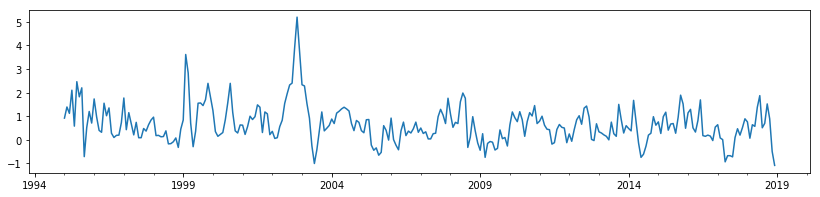

In [20]:
plt.figure(figsize=(14,3))
igpm.plot()

Cetip CDI mensal 

https://www.portalbrasil.net/indices_cdi.htm

In [21]:
cdi = pd.read_excel('cetip_cdi_mensal.xlsx', usecols=np.arange(1, 1+len(anos))) # CDI

In [22]:
cdi.head(12)

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,...,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995
0,0.5833,1.0846,1.0549,0.9293,0.8397,0.5866,0.8853,0.8606,0.6582,1.0427,...,1.26,1.97,1.53,1.26,1.44,2.17,2.67,1.74,2.56,3.47
1,0.4649,0.8638,1.0014,0.8185,0.7826,0.4815,0.7415,0.8424,0.5925,0.8527,...,1.08,1.83,1.25,1.01,1.44,2.35,2.11,1.65,2.31,3.23
2,0.5315,1.0504,1.1605,1.0361,0.7599,0.5377,0.8083,0.9188,0.7569,0.9665,...,1.37,1.77,1.37,1.25,1.44,3.28,2.18,1.63,2.20,4.41
3,0.5175,0.7852,1.0544,0.9482,0.8154,0.6008,0.6999,0.8388,0.6639,0.8356,...,1.17,1.87,1.48,1.18,1.28,2.28,1.69,1.65,2.03,4.22
4,0.5175,0.9255,1.1074,0.9838,0.8582,0.5848,0.7324,0.9852,0.7500,0.7664,...,1.22,1.96,1.40,1.33,1.49,1.96,1.63,1.58,2.00,4.27
5,0.5175,0.8081,1.1605,1.0658,0.8174,0.5919,0.6385,0.9526,0.7908,0.7514,...,1.22,1.85,1.31,1.27,1.39,1.64,1.60,1.59,1.94,4.05
6,0.5422,0.7971,1.1074,1.1773,0.9404,0.7087,0.6754,0.9665,0.8592,0.7840,...,1.28,2.08,1.54,1.50,1.30,1.62,1.69,1.54,1.91,4.01
7,0.5669,0.8014,1.2135,1.1074,0.8595,0.6957,0.6865,1.0723,0.8863,0.6914,...,1.29,1.76,1.45,1.60,1.40,1.55,1.47,1.58,1.95,3.81
8,0.4681,0.6377,1.1074,1.1074,0.9005,0.6991,0.5371,0.9397,0.8445,0.6915,...,1.24,1.67,1.38,1.32,1.22,1.47,2.49,1.58,1.88,3.25
9,0.5430,0.6431,1.0474,1.1077,0.9448,0.8033,0.6072,0.8807,0.8056,0.6912,...,1.21,1.63,1.64,1.54,1.28,1.38,2.92,1.68,1.86,3.06


In [23]:
cdi.T.values.shape

(24, 12)

In [24]:
cdi.T[::-1].head()

,0,1,2,3,4,5,6,7,8,9,10,11
1995,3.47,3.23,4.41,4.22,4.27,4.05,4.01,3.81,3.25,3.06,2.84,2.73
1996,2.56,2.31,2.20,2.03,2.00,1.94,1.91,1.95,1.88,1.86,1.79,1.62
1997,1.74,1.65,1.63,1.65,1.58,1.59,1.54,1.58,1.58,1.68,2.99,2.92
1998,2.67,2.11,2.18,1.69,1.63,1.60,1.69,1.47,2.49,2.92,2.46,2.38
1999,2.17,2.35,3.28,2.28,1.96,1.64,1.62,1.55,1.47,1.38,1.37,1.58


In [25]:
cdi = pd.Series(cdi.T[::-1].values.ravel(), index=range_months)

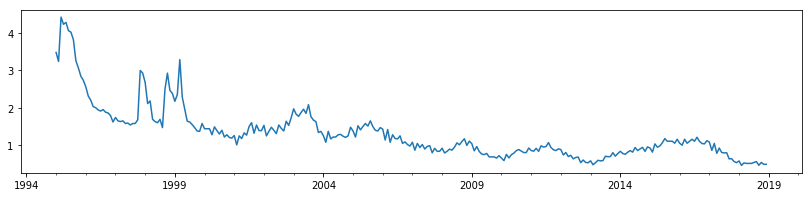

In [26]:
plt.figure(figsize=(14,3))
cdi.plot()

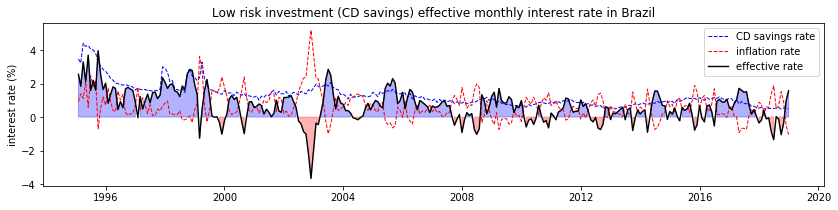

In [28]:
fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(111)
ax.plot(cdi, 'b--', lw=1.0, label='CD savings rate')
ax.plot(igpm, 'r--', lw=1.0, label='inflation rate')
txfixa=cdi-igpm
ax.plot(txfixa, 'k', lw=1.4, label='effective rate')
ax.fill_between(txfixa.index, txfixa.values, where=txfixa.values>0, color='blue', alpha=0.3)
ax.fill_between(txfixa.index, txfixa.values, where=txfixa.values<0, color='red', alpha=0.3)
ax.set_ylabel('interest rate (%)')
ax.set_title('Low risk investment (CD savings) effective monthly interest rate in Brazil')
plt.legend()
plt.savefig('low_risk.jpeg', dpi=200)

Certificate of deposit (CD) savings is a fixed rate and fixed term type of investment considered of low risk in Brazil. Unfortunately we cannot consider the CD savings interest rate alone because we also have in Brazil a considerable inflation. To have an idea of the effective interest rate of CD savings (CD savings rate minus inflation) I plotted on the x axis for every month over last 19 years the (nominal) interest rate for the CD savings, the inflation rate and effective rate varying on the y axis. I colored blue when above zero and red otherwise to help visualize "ok" months from months of loss. We can see weird months that caused money loss due very high inflation.

In [29]:
pwd

'/home/andre/Projects/sandbox'

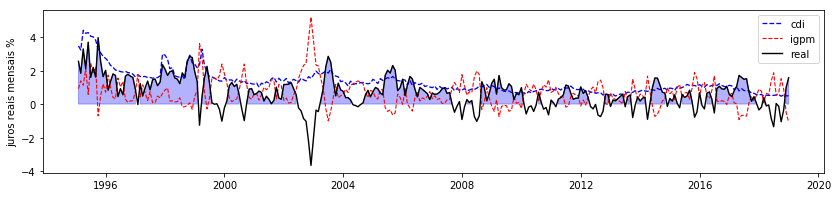

In [30]:
fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(111)
ax.plot(cdi, 'b--', lw=1.3, label='cdi')
ax.plot(igpm, 'r--', lw=1.1, label='igpm')
txfixa=cdi-igpm
ax.plot(txfixa, 'k', lw=1.4, label='real')
ax.fill_between(txfixa.index, txfixa.values, where=txfixa.values>0, color='blue', alpha=0.3)
ax.set_ylabel('juros reais mensais %')
plt.legend()

#### Juros real medio

In [31]:
txfixa.values[:100]

array([ 2.55,  1.84,  3.29,  2.12,  3.69,  1.59,  2.19,  1.61,  3.96,
        2.54,  1.64,  2.02,  0.83,  1.34,  1.8 ,  1.71,  0.45,  0.92,
        0.56,  1.67,  1.78,  1.67,  1.59,  0.89, -0.03,  1.22,  0.48,
        0.97,  1.37,  0.85,  1.45,  1.49,  1.1 ,  1.31,  2.35,  2.08,
        1.71,  1.93,  1.99,  1.56,  1.49,  1.22,  1.86,  1.63,  2.57,
        2.84,  2.78,  1.93,  1.33, -1.26,  0.45,  1.57,  2.25,  1.28,
        0.07, -0.01,  0.02, -0.32, -1.02, -0.23,  0.2 ,  1.09,  1.29,
        1.05,  1.18,  0.54, -0.27, -0.99,  0.06,  0.9 ,  0.92,  0.56,
        0.64,  0.78,  0.69,  0.18,  0.47,  0.29,  0.02,  0.22,  1.01,
        0.36,  0.29,  1.17,  1.17,  1.19,  1.28,  0.92,  0.57, -0.23,
       -0.41, -0.87, -1.02, -2.23, -3.66, -2.02, -0.36, -0.45,  0.24,
        0.95])

taxa de juros media mensal 2008 a 2018

In [32]:
(np.prod(txfixa[-10*12:]*0.01+1.))**(1/(len(anos[-10:])*12))-1

0.0035170206098658063

anual

In [33]:
(0.0035+1)**12-1

0.04281800719861506

In [34]:
(0.005+1)**12-1

0.06167781186449828